In [23]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [54]:
x_0 = tf.random.normal([20], 3, 1)
x_1 = tf.random.normal([20], 5.5, 1)
y_0 = tf.zeros(20)
y_1 = tf.ones(20)

# print(x_0)
# print(x_1)

x = tf.concat([x_0, x_1], axis = 0)
y = tf.concat([y_0, y_1], axis = 0)

print(x.shape)
print(y.shape)
print(y)

(40,)
(40,)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(40,), dtype=float32)


In [55]:
def plot_graph(X,Y,X_hat=None,Y_hat=None,str_title=None):
    fig = plt.figure(figsize=(8,6))
    
    if str_title is not None :
        plt.title(str_title,fontsize=20, pad=20)
        
    plt.plot(X,Y, ls='none', marker='x')
    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)
        
    plt.tick_params(axis='both',labelsize=14)

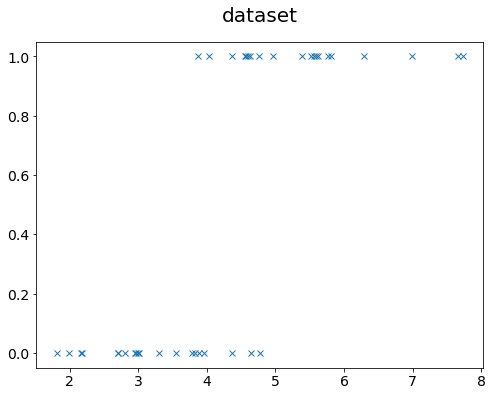

In [56]:
plot_graph(x, y, str_title='dataset')

In [57]:
W = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

print(W)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.260564], dtype=float32)>


In [58]:
def cross_entropy(y_pred, y_true):
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return -tf.reduce_sum(y_true*tf.math.log(y_pred)+(1-y_true)*(tf.math.log(1-y_pred)))

In [67]:
lr = 0.001
optimizer = tf.optimizers.SGD(lr)

def run_optimization():
    with tf.GradientTape() as g:    #loss값을 GradientTape에 저장
        pred = 1/(1+tf.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)
        
    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

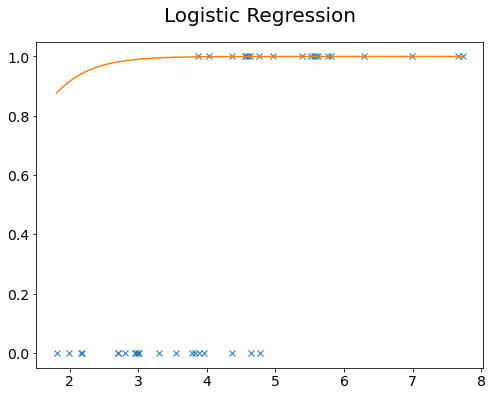

In [60]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x,y, X_hat=x_fl, Y_hat=1/(1+tf.exp(-1*(W*x_fl+b))), str_title="Logistic Regression")

In [68]:
training_steps = 1000
display_step = 50
end_step = 0
for step in range(1, training_steps+1):
    run_optimization()
    
    if step % display_step == 0:
        pred = 1/(1+tf.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)
        print("step: ", step, ", loss: ", loss.numpy())
        
end_step = step

step:  50 , loss:  10.1201935
step:  100 , loss:  10.120178
step:  150 , loss:  10.120163
step:  200 , loss:  10.120148
step:  250 , loss:  10.120132
step:  300 , loss:  10.120117
step:  350 , loss:  10.120102
step:  400 , loss:  10.120087
step:  450 , loss:  10.120071
step:  500 , loss:  10.120057
step:  550 , loss:  10.120043
step:  600 , loss:  10.120029
step:  650 , loss:  10.120014
step:  700 , loss:  10.119999
step:  750 , loss:  10.1199875
step:  800 , loss:  10.119973
step:  850 , loss:  10.119957
step:  900 , loss:  10.119944
step:  950 , loss:  10.11993
step:  1000 , loss:  10.119917


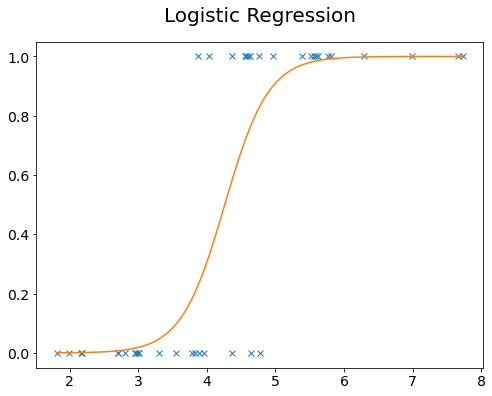

In [69]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x,y, X_hat=x_fl, Y_hat=1/(1+tf.exp(-1*(W*x_fl+b))), str_title="Logistic Regression")

In [70]:
training_steps = 1000
display_step = 50
for step in range(end_step+1, end_step+training_steps+1):
    run_optimization()
    
    if step % display_step == 0:
        pred = 1/(1+tf.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)
        print("step: ", step, ", loss: ", loss.numpy())
        
end_step = step

step:  1050 , loss:  10.119902
step:  1100 , loss:  10.119887
step:  1150 , loss:  10.119873
step:  1200 , loss:  10.119861
step:  1250 , loss:  10.119846
step:  1300 , loss:  10.119833
step:  1350 , loss:  10.119819
step:  1400 , loss:  10.119806
step:  1450 , loss:  10.119792
step:  1500 , loss:  10.119778
step:  1550 , loss:  10.119764
step:  1600 , loss:  10.11975
step:  1650 , loss:  10.119736
step:  1700 , loss:  10.119724
step:  1750 , loss:  10.11971
step:  1800 , loss:  10.119698
step:  1850 , loss:  10.119683
step:  1900 , loss:  10.119671
step:  1950 , loss:  10.119658
step:  2000 , loss:  10.119646


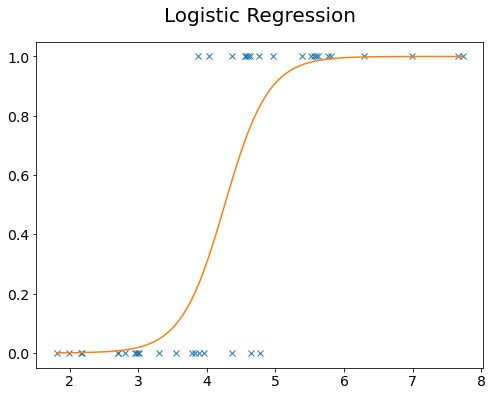

In [71]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x,y, X_hat=x_fl, Y_hat=1/(1+tf.exp(-1*(W*x_fl+b))), str_title="Logistic Regression")

In [72]:
training_steps = 10000
display_step = 500
for step in range(end_step+1, end_step+training_steps+1):
    run_optimization()
    
    if step % display_step == 0:
        pred = 1/(1+tf.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)
        print("step: ", step, ", loss: ", loss.numpy())
        
end_step = step

step:  2500 , loss:  10.119522
step:  3000 , loss:  10.1194
step:  3500 , loss:  10.119284
step:  4000 , loss:  10.119173
step:  4500 , loss:  10.119068
step:  5000 , loss:  10.118965
step:  5500 , loss:  10.118868
step:  6000 , loss:  10.118775
step:  6500 , loss:  10.118683
step:  7000 , loss:  10.118599
step:  7500 , loss:  10.118517
step:  8000 , loss:  10.118437
step:  8500 , loss:  10.1183605
step:  9000 , loss:  10.118289
step:  9500 , loss:  10.118219
step:  10000 , loss:  10.118154
step:  10500 , loss:  10.118087
step:  11000 , loss:  10.118027
step:  11500 , loss:  10.117969
step:  12000 , loss:  10.11791


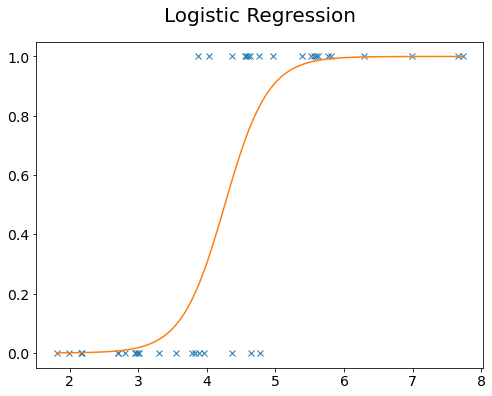

In [73]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x,y, X_hat=x_fl, Y_hat=1/(1+tf.exp(-1*(W*x_fl+b))), str_title="Logistic Regression")